<a href="https://colab.research.google.com/github/Saifullah785/machine-learning-engineer-roadmap/blob/main/Lecture_56_Ridge_Regression_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Ridge Regression Part 1 | Geometric Intuition and Code | Regularized Linear Models**

In [42]:
# imports core libraries for numerical operations, data handling, and plotting.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [43]:
# imports the diabetes dataset from scikit-learn.

from sklearn.datasets import load_diabetes

data = load_diabetes()

In [44]:
# prints the description of the diabetes dataset.

print (data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [45]:
#eparates the features (X) and target variable (y) from the dataset.


X = data.data
y=data.target

In [46]:
# splits the data into training and testing sets

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=45)
#

In [47]:
# imports the Linear Regression model

from sklearn.linear_model import LinearRegression

In [48]:
# initializes a Linear Regression model.

L = LinearRegression()

In [49]:
# trains the Linear Regression model on the training data.

L.fit(X_train,y_train)

LinearRegression()

In [50]:
# makes predictions using the trained Linear Regression model.

y_pred = L.predict(X_test)

In [51]:
# imports metrics for evaluating regression models.

from sklearn.metrics import r2_score, mean_squared_error

In [52]:
# prints the R2 score and Mean Squared Error for the Linear Regression model.

print("R2 score",r2_score(y_test, y_pred))
print("MSE",np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score 0.5188113124539249
MSE 48.72713760953253


In [53]:
#imports the Ridge Regression model.
#initializes a Ridge Regression model with a specified alpha value.

from sklearn.linear_model import Ridge
R = Ridge(alpha=0.0001)

In [54]:
#trains the Ridge Regression model on the training data.

R.fit(X_train,y_train)

Ridge(alpha=0.0001)

In [55]:
#predictions using the trained Ridge Regression model.

y_pred1 = R.predict(X_test)

In [56]:
# prints the R2 score and Mean Squared Error for the Ridge Regression model.

print("R2 score",r2_score(y_test, y_pred1))
print("MSE",np.sqrt(mean_squared_error(y_test, y_pred1)))

R2 score 0.5189732635884949
MSE 48.71893700181956


This cell generates synthetic data for demonstrating polynomial regression and Ridge regularization.

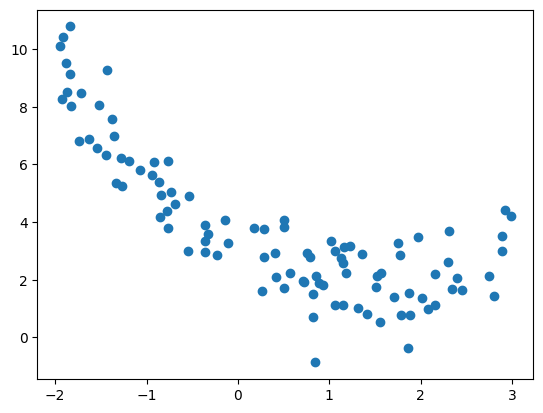

In [57]:
m = 100
x1 = 5 * np.random.rand(m, 1 ) - 2
x2 = 0.7 * x1 ** 2 - 2 * x1 + 3 + np.random.randn(m, 1)

plt.scatter(x1, x2)
plt.show()

This cell defines a function to get predictions using a Ridge model within a polynomial regression pipeline and then plots the results for different alpha values.

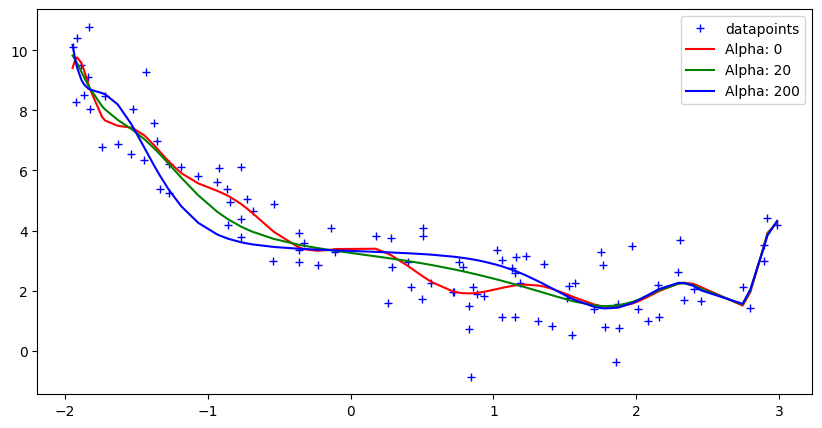

In [58]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures


def get_preds_ridge(x1, x2, alpha):
    model = Pipeline([
        ("poly_feats", PolynomialFeatures(degree=16)),
        ("ridge", Ridge(alpha=alpha))
    ])
    model.fit(x1, x2)
    return model.predict(x1)

alphas = [0, 20, 200]
cs = ['r', 'g', 'b']

plt.figure(figsize=(10, 5))
plt.plot(x1, x2, 'b+', label='datapoints')

for alpha, c in zip(alphas, cs):
    preds = get_preds_ridge(x1, x2, alpha)
    # plot
    plt.plot(sorted(x1[:, 0]), preds[np.argsort(x1[:, 0])], c, label='Alpha: {}'.format(alpha))

plt.legend()
plt.show()
